## 네이버 검색 API를 활용하여 뉴스를 크롤링하고 본문 키워드를 워드클라우드로 시각화 해보자!

### 네이버 검색 API 활용
- **API(Application Programming Interface)** : 두 소프트웨어(사용자, 제공자)가 서로 통신할 수 있게 해주는 메커니즘과 해당 기능을 사용할 수 있게 하는 프로그램
- Library와의 차이점은 Library는 특정 기능을 구현하기 위한 코드의 집합으로 내부 코드를 이해하고 사용해야 하지만, API는 통신이 가능한 상황에서 간단한 명령으로 필요한 기능들을 상대전으로 쉽게 구현할 수 있게 지원하므로 사용하기가 수월함(단 API는 비용이 드는 경우가 많음)

- 네이버 개발자 센터 페이지 : https://developers.naver.com/main/
- 네이버 검색 API : 뉴스, 백과사전, 블로그, 쇼핑, 웹, 문서, 전문지식, 지식IN, 책, 카페 등 분야별로 네이버 검색 결과는 JSON형태로 반환하는 기능을 지원(검색 API의 하루 호출 한도는 25,000회)
  - **JSON(JavaScript Object Notation)** : JS객체 문법을 따르는 텍스트 기반의 데이터 포맷으로 여러개의 딕셔너리들이 계층적으로 분포하는 형태이며 인간이 읽고 쓰기 쉽고, 기계가 구문을 분석하기 쉽도록 경량화된 데이터 교환 형식
  - 다른 프로그래밍 언어에서도 많이 사용되며 파이썬에서는 JSON을 딕셔너리로 변환하여 주로 사용함(단, JSON형식은 반드시 ""(큰따옴표)로 묶어야 함)

### 네이버 검색 API 호출 및 검색 결과 확인

In [5]:
import json
import requests as req

client_id = "Upx6zTAtGW45JVqBvyd6"
client_secret = "53OrmdIUUL"

keyword = "경제"
display_amount = 100
start_position = 1

# 기본 url에 각 피마리터들을 쿼리스트링(?로 시작해서 여러 피라미터들을 & 로 이어주는 형식) 형식으로 전달
 # query : 검색어 작성(필수)
 # display : 한 번에 표시할 검색 결과 개수 (기본값:10, 최대값:100)
 # start : 검색 시작 위치 (기본값:1, 최대값:100)
url = f"https://openapi.naver.com/v1/search/news.json?query={keyword}&display={display_amount}&start={start_position}"

# 네이버 API 호출 시 HTTP header에 client_id와 client_secret을 포함해서 전송해야 함(네이버 API 사용을 위한 유저 인증 과정!)
N_A = {"X-Naver-Client-Id":client_id, "X-Naver-Client-Secret":client_secret}

# 웹 통신 요청
res = req.get(url, headers=N_A)

# 피싱(text를 json코드로 변환)
my_json = json.loads(res.text)
my_json

print("my_json 자료형 :", type(my_json))
print("my_json 키 종류 :", my_json.keys())
print("my_json items 개수 :", len(my_json['items']))
print("첫번째 뉴스 키 종류 :", my_json['items'][0].keys())
print()

# 네이버 뉴스에 대한 정보만 출력
cnt = 1
for i in my_json['items'] :
    # 네이버 뉴스만 검색
    if 'n.news.naver' in i.get('link') :
        print("Count :", cnt)
        print("Title :", i.get('title'))
        print("link :", i.get('link'))
        print("description :", i.get('description'))
        print()
        cnt += 1

my_json 자료형 : <class 'dict'>
my_json 키 종류 : dict_keys(['lastBuildDate', 'total', 'start', 'display', 'items'])
my_json items 개수 : 100
첫번째 뉴스 키 종류 : dict_keys(['title', 'originallink', 'link', 'description', 'pubDate'])

Count : 1
Title : 기장군의회 &quot;정관선 예타 조속히 통과돼야&quot;
link : https://n.news.naver.com/mnews/article/417/0001089887?sid=102
description : 박우식 위원장과 특별위원회 위원들은 &quot;정관선은 기장군 내 급증하고 있는 내·외부적 교통 수요는 물론 부·울·경 광역 철도망을 유기적으로 연계할 수 있다&quot;며 &quot;<b>경제</b>성과 공공성을 겸비한 국가적 사업으로서 정관선의... 

Count : 2
Title : 웹3 스트리밍 ‘사이드킥’, 알토스 벤처스 투자 유치
link : https://n.news.naver.com/mnews/article/009/0005526563?sid=101
description : 사이드킥 랩스는 창작자와 시청자 모두 실질적인 <b>경제</b>적 가치를 공유할 수 있는 생태계를 구축하고 있는 라이브 스트리밍 플랫폼이다. ‘라이브파이(LiveFi)’라는 콘텐츠 제작–사용자 참여–온체인 전환으로... 

Count : 3
Title : 삼전 '웃고' 하이닉스 '울고'…주가 희비 엇갈린 이유[특징주]
link : https://n.news.naver.com/mnews/article/018/0006067870?sid=101
description : 이재용 삼성전자 회장이 지난달 13일 서울 용산 대통령실에서 이재명 대통령 주재로 열린 6<b>경제</b>단체·기업인 간담회에 참석하고 있다. (사진=연합뉴스) 17일 엠피닥터에 따르면, 오후 

### 워드클라우드 실습

In [6]:
!pip install wordcloud

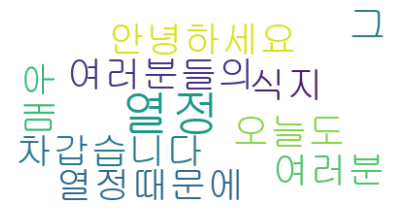

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 워드클라우드 객체 생성
wc = WordCloud(font_path=r"C:\Windows\Fonts\Gulim.ttc",   # 한글 글꼴 지정
                background_color="white",               # 워드클라우드 이미지 배경색 지정
                max_words=10,                            # 워드클라우드 내부 표시될 단어 최대 개수
                random_state=99,                         # 단어의 출력 위치를 고정하기 위한 랜덤시드 설정
                stopwords=['등','있다','및','수','이']    # 제외하고 싶은 단어 설정(불용어 처리)
              )

text = "안녕하세요 여러분. 오늘도 여러분들의 열정때문에 매우 차갑습니다. 그 열정 식지 않고 계속 가시길 바랍니다. 열정..! 하지만 집에 가고싶아"

# generate : 문자열에서 단어의 빈도(띄어쓰기 기준)를 자동 계산하여 워드클라우드 생성
wc.generate(text)

fig = plt.figure(figsize=(5,5))
# interpolation : 보간법(이미 알려진 값 사이의 알려지지 않은 값을 추정하는 것)
 # 현재는 bilinear로 이중선형 보간법을 적용하여 단어의 엣지 부분을 부드럽게 출력해줌
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")      # x축, y축이 표시되지 않음
plt.show()

### Streamlit을 활용하여 네이버 검색 API를 활용한 워드클라우드 출력 사이트 만들기

In [32]:
%%writefile module/myApp30.py
import json
import requests as req
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
from wordcloud import WordCloud
from PIL import Image
from bs4 import BeautifulSoup as bs

# ================================= 함수 설정 ==================================
# 네이버 검색 API를 활용한 뉴스 검색 결과를 반환해 주는 함수
def getRequest(keyword, display, start) :
    url = f"https://openapi.naver.com/v1/search/news.json?query={keyword}&display={display}&start={start}"
    N_A = {"X-Naver-Client-Id":st.session_state['client_id'], 
           "X-Naver-Client-Secret":st.session_state['client_secret']}
    res = req.get(url, headers=N_A)
    my_json = json.loads(res.text)
    return my_json["items"]

# 워드 클라우드 시각화 함수
 # (문자열 텍스트, 배경 이미지, 최대 출력 단어수, empty 공간)
def wcChart(corpus, back_mask, max_words, emp) :
    if back_mask == '타원' :
        img = Image.open('data/background_1.png')
    elif back_mask == '말풍선' :
        img = Image.open('data/background_2.png')
    elif back_mask == '하트' :
        img = Image.open('data/background_3.png')
    else :
        img = Image.open('data/background_0.png')

    # 워드클라우드에 적용하기 위해 이미지를 배열로 변환
    my_mask = np.array(img)
    
    wc = WordCloud(font_path=r"C:\Windows\Fonts\Gulim.ttc",  
                background_color="white",            
                max_words=max_words,               
                random_state=99,                        
                stopwords=['등','있다','및','수','이', 'the','a','of','to','in','and','said','was', 'by'], 
                mask=my_mask     # 배경 지
              )
    wc.generate(corpus)
    fig = plt.figure(figsize=(10,10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    st.pyplot(fig)
    emp.info(':orange[**워드클라우드 이미지 생성 완료 ^-^**]', icon='😉')
# =========================================================================

# ========================= 세션 설정 =====================================
if 'client_id' not in st.session_state :
    st.session_state['client_id'] = ''                # 각자 본인의 ID, PW로 설정해도 가능!

if 'client_secret' not in st.session_state :
    st.session_state['client_secret'] = ''
# =========================================================================

# ========================= 사이드바 설정(client_id, client_secret 입력 부분) =====================================
with st.sidebar.form(key="form1", clear_on_submit=False) :
    st.header('✨네이버 API 설정✨')
    client_id = st.text_input("Client ID:", value=st.session_state['client_id'])
    # type ='password' : 텍스트 입력 시 보이지 않게 처리(비밀번호 등을 입력받을때 사용)
    client_secret = st.text_input("Client Secret:", value=st.session_state['client_secret'], type = 'password')

    if st.form_submit_button(label="OK") :
        st.session_state['client_id'] = client_id
        st.session_state['client_secret'] = client_secret
        st.write("설정 완료!")
# ===============================================================================================================

# ========================= 메인화면 설정 =====================================
# 진행 현황을 띄어줄 빈 공간 설정(문구는 최종 출력만 나오도록 empty로 설정)
chart_emp = st.empty()

try :
    with st.form(key="Search", clear_on_submit=False) :
        # 키워드 선택
        search_keyword = st.selectbox("키워드 :", ["경제","정치","사회","국제","연예","IT","문화"])
        # 수집 분량 선택(1당100개씩)
        data_amount = st.slider("분량(1당 100개) :", min_value=1, max_value=5, value=1, step=1)
        # 워드클라우드 배경 마스크 이미지 선택(horizontal=True : 수평 설정)
        back_mask = st.radio("워드클라우드 출력 형태 :", ['기본','타원','말풍선','하트'], horizontal=True)
        if st.form_submit_button('출력') :
            chart_emp.info("red[데이터 가져오는 중...]", icon="🤔")

            corpus = ""   # 수집된 문자열이 담길 변수 지정
            items = []    # 뉴스 항목이 담길 리스트 설정

            # 입력받은 수집 분량(data_amount) 만큼 반복해서 뉴스 기사 정보 가져오기
            for i in range(data_amount) :
                items.extend(getRequest(search_keyword, 100, 100*i+1))     # (검색어, 한번에 표시할 양, 시작지점)
            # 네이버 검색 API로 얻은 링크로 각각 들어가서 본문 내용 크롤링
            for item in items :    # 위에서 먼저 데이터를 수집해야 items에 값이 들어감
                # item은 딕셔너리 타입, items는 리스트 타입
                if 'n.news.naver' in item['link'] :
                    news_url = item['link']
                    res =req.get(news_url, headers={"User-Agent":"Mozilla"})    # 혜더에 브라우저로 인식되게 설정
                    soup = bs(res.text, "lxml")                                 # 파싱(bs객체화) 진행
                    news_tag = soup.select_one("#dic_area")                     # 뉴스 본문을 품은 dic_area 아이디로 접근

                    if news_tag :
                        corpus += news_tag.text + ' '         # 본문의 텍스트를 corpus에 계속 추가해주기

            st.write(f"수집된 corpus 길이 : {len(corpus)}")

            # 워드클라우드를 생성(단, corpus길이가 너무 적으면 워드클라우드 출력이 애매해지므로 100개 이상일 경우에 출력되게 조건 설정)
            if len(corpus) >= 100 :
                chart_emp.info(":red[이미지 생성중...]", icon="😋")
                wcChart(corpus, back_mask, 70, chart_emp)
            else :
                chart_emp.error(":red[워드클라우드를 생성하기에 데이터가 충분하지 않습니다.]")
             
except :
    chart_emp.error("ID와 PW를 입력해주세요~!")


Overwriting module/myApp30.py


In [26]:
list1 = [1,2,3]
list2 = [4,5,6]

list1.extend(list2)

list1

[1, 2, 3, 4, 5, 6]